# Word Clouds
### _(Work in progress)_

In this notebook, we will see how we can use the [PySS3](https://github.com/sergioburdisso/pyss3) Python package to generate word cloud using the values learned by the model using the [`clf.save_wordcloud()`](https://pyss3.readthedocs.io/en/latest/api/index.html#pyss3.SS3.save_wordcloud) function.

Let us begin! First, we need to import the modules we will be using:

In [2]:
%matplotlib inline

from pyss3 import SS3
from pyss3.util import Dataset

Then, before moving any further, we will unzip the training data. Since it is located in [the same directory](https://github.com/sergioburdisso/pyss3/tree/master/examples) as this notebook file ([wordcloud.ipynb](https://github.com/sergioburdisso/pyss3/blob/master/examples/wordcloud.ipynb)), we could simply use the following command-line command:

In [1]:
!unzip -u datasets/movie_review.zip -d datasets/

Archive:  datasets/movie_review.zip


Let's create a new instance of the SS3 classifier. We're going to use the same dataset that is used in the [Sentiment Analysis on Movie Reviews](https://pyss3.readthedocs.io/en/latest/tutorials/movie-review-notebook.html#movie-reviews-notebook) tutorial. This dataset was created collecting IMDB reviews tagged either with *“pos”* or *“neg”*, indicating a positive or a negative review, respectively.

In [3]:
# [create a new instance of the SS3 classifier]
# Just ignore those hyperparameter values (s=.44, l=.48, p=.5)
# they were obtained from the tutorial (after performing hyperparameter optimization)
# We could've been used just the default values simply with
# clf = SS3()
# but classification results would have been suboptimal (not optimized)
clf = SS3(s=.44, l=.48, p=.5)

# Let's load the training set
x_train, y_train = Dataset.load_from_files("datasets/movie_review/train")

# Let the training begin...
clf.train(x_train, y_train, n_grams=3)

Training on 'pos': 100%|██████████| 2/2 [00:16<00:00,  8.47s/it]


Let's create the default word cloud for the positive class:

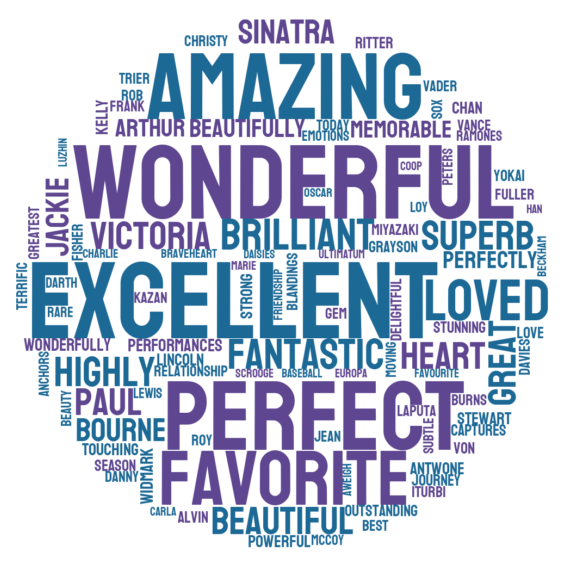

In [4]:
clf.save_wordcloud("pos", plot=True)

Now the default cloud for the negative class, we will use a different color. The complete list of HTML color names is available [here](https://www.w3schools.com/colors/colors_names.asp)), however, here we will be using "tomato" for the negative class:

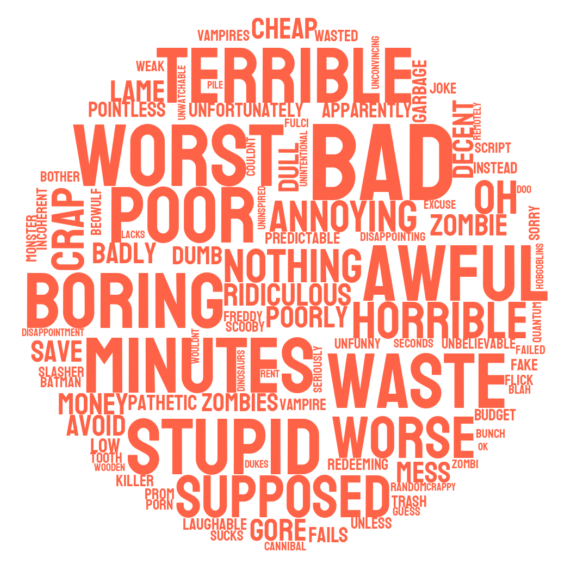

In [6]:
clf.save_wordcloud("neg", color="tomato", plot=True)

Now well create a word cloud showing the learned word bigrams for the positive class:

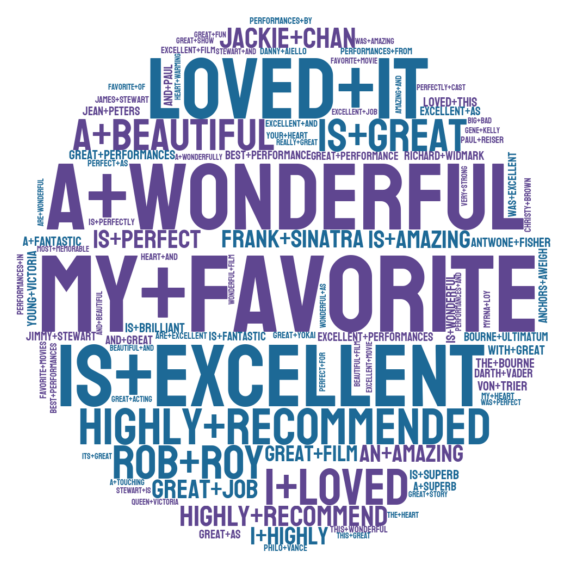

In [7]:
clf.save_wordcloud("pos", n_grams=2, plot=True)

what about 3-grams?

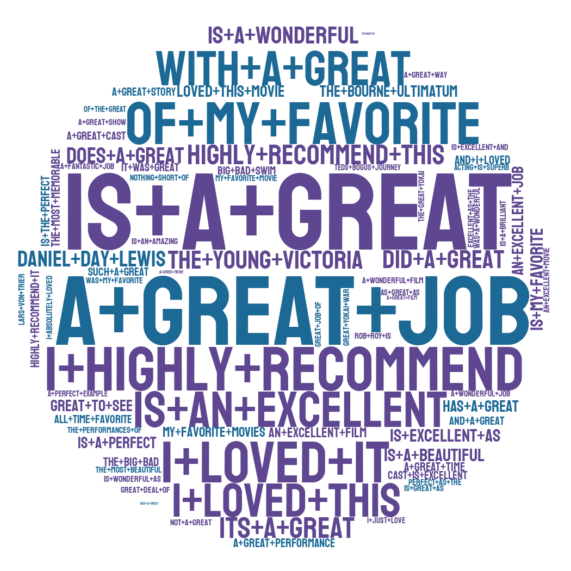

In [10]:
clf.save_wordcloud("pos", n_grams=3, plot=True)

And 3-grams for the negative class?

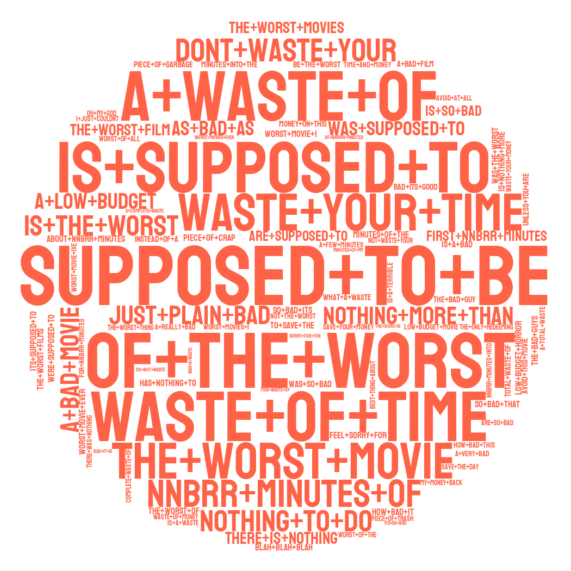

In [12]:
clf.save_wordcloud("neg", n_grams=3, color="tomato", plot=True)

Only the top-5 positive 3-grams?

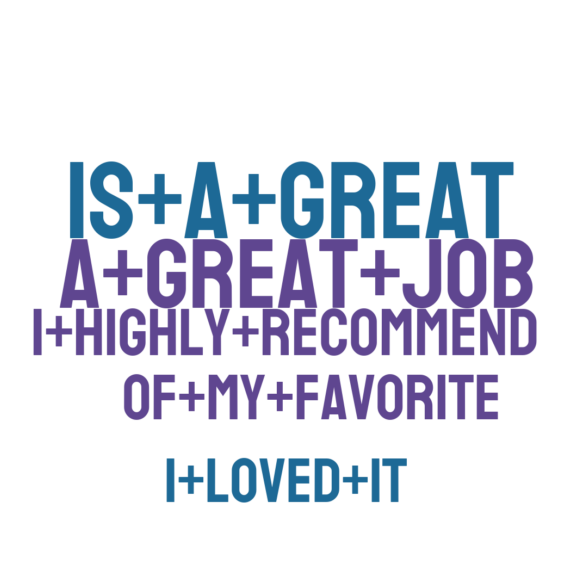

In [15]:
clf.save_wordcloud("pos", top_n=5, n_grams=3, plot=True)

All these word clouds have been saved to this in the current working directory. Names have been created automatically based on the given argument values.

In [16]:
!ls

custom_preprocessing.ipynb  wordcloud.ipynb
datasets		    wordcloud_top100_neg.png
extract_insight.ipynb	    wordcloud_top100_neg(trigrams).png
imgs			    wordcloud_top100_pos(bigrams).png
movie_genres.ipynb	    wordcloud_top100_pos.png
movie_review.ipynb	    wordcloud_top100_pos(trigrams).png
pyss3			    wordcloud_top10_neg(trigrams).png
README.md		    wordcloud_top5_neg(trigrams).png
ss3_models		    wordcloud_top5_pos(trigrams).png
topic_categorization.ipynb


However, if you want to save the image with a custom name using a custom path, you can use the ``path`` argument, as follows:

In [17]:
clf.save_wordcloud("pos", path="./my_beautiful_cloud.jpg")